odruda,num,mean,median,min,max,sd,norm_test,sym_test
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,100,301.6815,301.660,292.170,311.860,5.726769,1.598946e-04,0.9641963
B,100,297.6724,297.595,288.770,307.170,5.340501,3.189282e-04,0.8609465
C,100,299.9898,300.840,288.192,311.928,6.914613,2.082877e-03,0.1318902
D,100,300.2972,300.280,290.870,309.940,6.316066,1.292412e-05,0.9742477



	Bartlett test of homogeneity of variances

data:  zlepseni by odruda
Bartlett's K-squared = 7.5687, df = 3, p-value = 0.05582



	Kruskal-Wallis rank sum test

data:  zlepseni by odruda
Kruskal-Wallis chi-squared = 20.937, df = 3, p-value = 0.0001085


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 20.9375, df = 3, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          A          B          C
---------+---------------------------------
       B |   4.506644
         |    0.0000*
         |
       C |   1.901493  -2.605150
         |     0.3434     0.0551
         |
       D |   1.580704  -2.925939  -0.320789
         |     0.6837    0.0206*     1.0000

alpha = 0.05
Reject Ho if p <= alpha


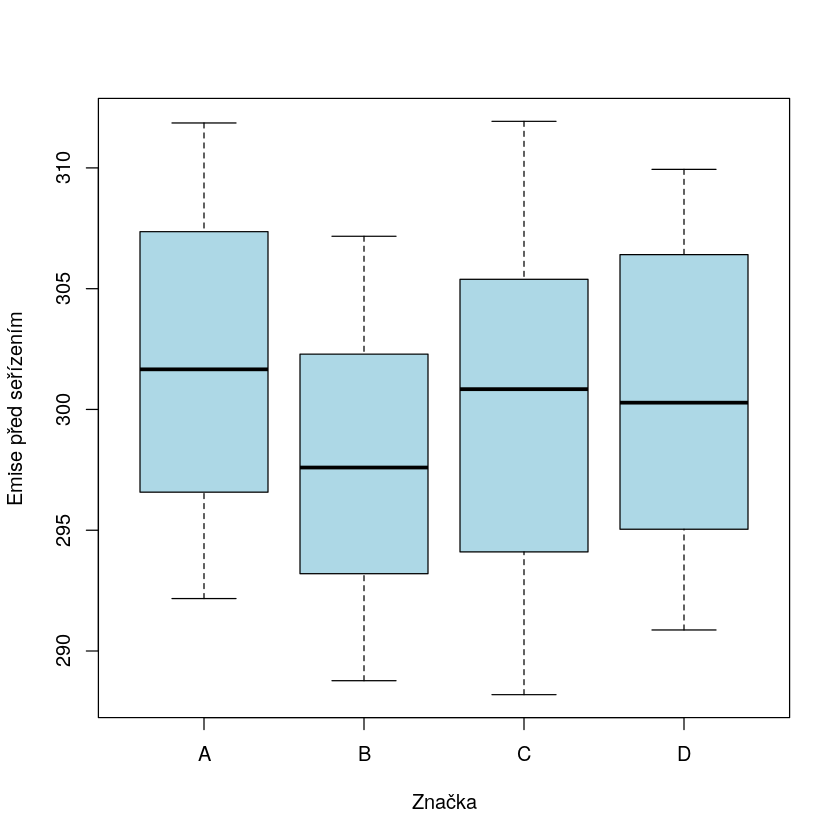

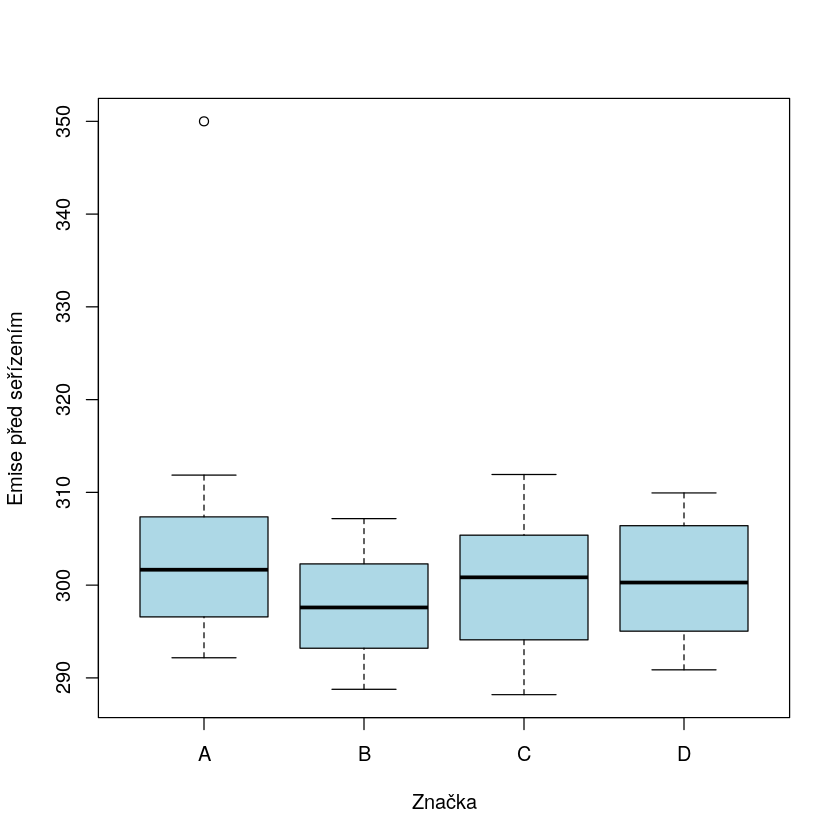

In [14]:
library(dplyr)
# Nastavení náhodného semene pro reprodukovatelnost
set.seed(3)

# Počet motorů pro každou značku
n <- 100

# Generování dat
id <- 1:(4 * n)
odruda <- rep(c("A", "B", "C", "D"), each = n)
vynos_2024 <- round(runif(4 * n, min = 290, max = 310), 2) # emise před seřízením
vynos_2023 <- round(vynos_2024 - rnorm(4 * n, mean = 10, sd = 1.5), 2) # emise po seřízení
vynos_2024[odruda == "A"] <- vynos_2024[odruda == "A"] + 2 # zvýšení emisí pro značku X
vynos_2024[odruda == "B"] <- vynos_2024[odruda == "B"] - 2 # snížení emisí pro značku Y
vynos_2024[odruda == "C"] <- (vynos_2024[odruda == "C"] - 300) * 1.2 + 300 # zvýšení emisí pro značku Z
typ_hnojiva <- sample(c("synteticke", "prirodni"), 4 * n, replace = TRUE, prob = c(0.3, 0.7)) # 10% problémy
vynos_2023[typ_hnojiva == "synteticke"] <- vynos_2023[typ_hnojiva == "synteticke"] + 0.1 # zvýšení emisí pro problémové motory

# Vytvoření data frame
data <- data.frame(
    id = id,
    odruda = odruda,
    vynos_2024 = vynos_2024,
    vynos_2023 = vynos_2023,
    typ_hnojiva = typ_hnojiva
)

# Zobrazení prvních několika řádků data frame
data$zlepseni <- (data$vynos_2024)

for (i in 1:4) {
    outliers <- data %>%
        group_by(odruda) %>%
        rstatix::identify_outliers(zlepseni)

    data$vynos_2024 <- ifelse(data$id %in% outliers$id, 300, data$vynos_2024)
    data$vynos_2023 <- ifelse(data$id %in% outliers$id, 300, data$vynos_2023)
    data <- na.omit(data)
}

data$zlepseni <- (data$vynos_2024)
boxplot(data$zlepseni ~ data$odruda, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")

summry <- data %>%
    group_by(odruda) %>%
    summarise(
        num = n(),
        mean = mean(zlepseni),
        median = median(zlepseni),
        min = min(zlepseni),
        max = max(zlepseni),
        sd = sd(zlepseni),
        norm_test = shapiro.test(zlepseni)$p.value,
        sym_test = lawstat::symmetry.test(zlepseni, boot = FALSE)$p.value
    )
summry
bartlett.test(zlepseni ~ odruda, data = data)
kruskal.test(zlepseni ~ odruda, data = data)
dunn.test::dunn.test(data$zlepseni, data$odruda, method = "bonferroni", altp = TRUE)

data$vynos_2024[16] <- 350

data1 <- data
data1$zlepseni <- (data1$vynos_2024)
boxplot(data1$zlepseni ~ data1$odruda, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")


In [15]:
data1 <- data1 %>% select(id, odruda, vynos_2023, vynos_2024, typ_hnojiva)
data1$typ_hnojiva[data1$typ_hnojiva == "synteticke"] <- "profesional"
data1$typ_hnojiva[data1$typ_hnojiva == "prirodni"] <- "amater"
colnames(data1) <- c("id", "vyrobce", "propustnost_puvodni", "propustnost_nova", "montaz")
library(openxlsx)

write.xlsx(data1, file = "zk4A.xlsx", rowNames = FALSE)

-----


odruda,num,mean,median,min,max,sd,norm_test,sym_test
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,100,3.98110,4.015,-8.17,15.68,5.178571,0.7409336,0.9312911
B,100,6.87380,7.395,-4.18,19.10,4.938038,0.3966737,0.1480296
C,100,5.87126,5.395,-6.40,19.00,5.424914,0.5583202,0.2432175
D,100,4.62190,4.625,-5.70,15.90,4.410722,0.9229796,0.9926549



	Bartlett test of homogeneity of variances

data:  zlepseni by odruda
Bartlett's K-squared = 4.5217, df = 3, p-value = 0.2104



	Kruskal-Wallis rank sum test

data:  zlepseni by odruda
Kruskal-Wallis chi-squared = 18.438, df = 3, p-value = 0.0003572


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 18.4379, df = 3, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          A          B          C
---------+---------------------------------
       B |  -3.967202
         |    0.0004*
         |
       C |  -2.346744   1.620458
         |     0.1136     0.6308
         |
       D |  -0.807629   3.159572   1.539114
         |     1.0000    0.0095*     0.7427

alpha = 0.05
Reject Ho if p <= alpha


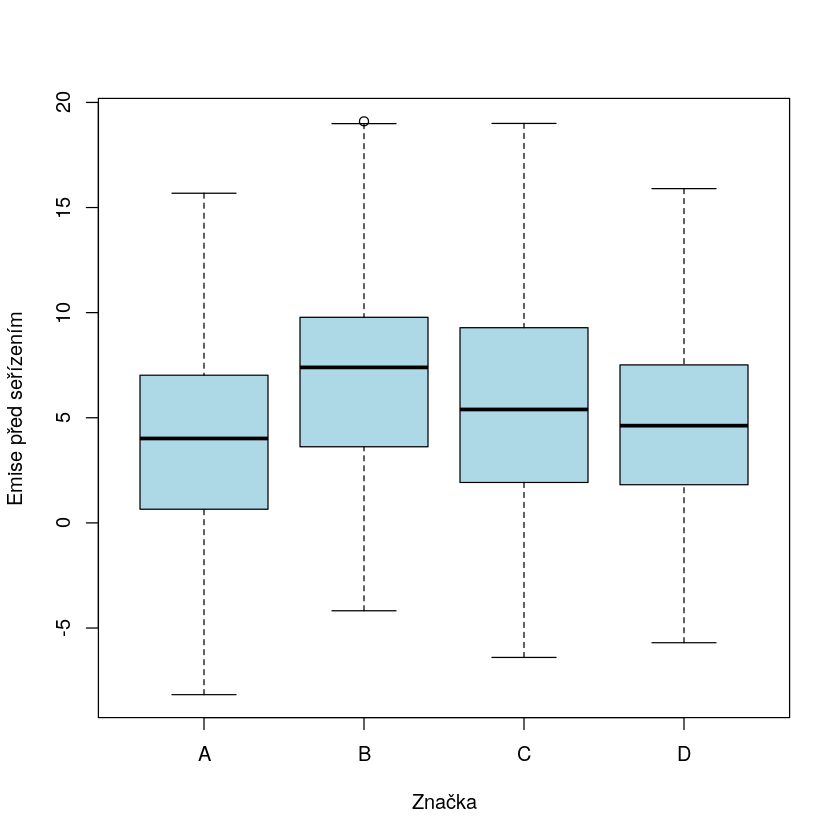

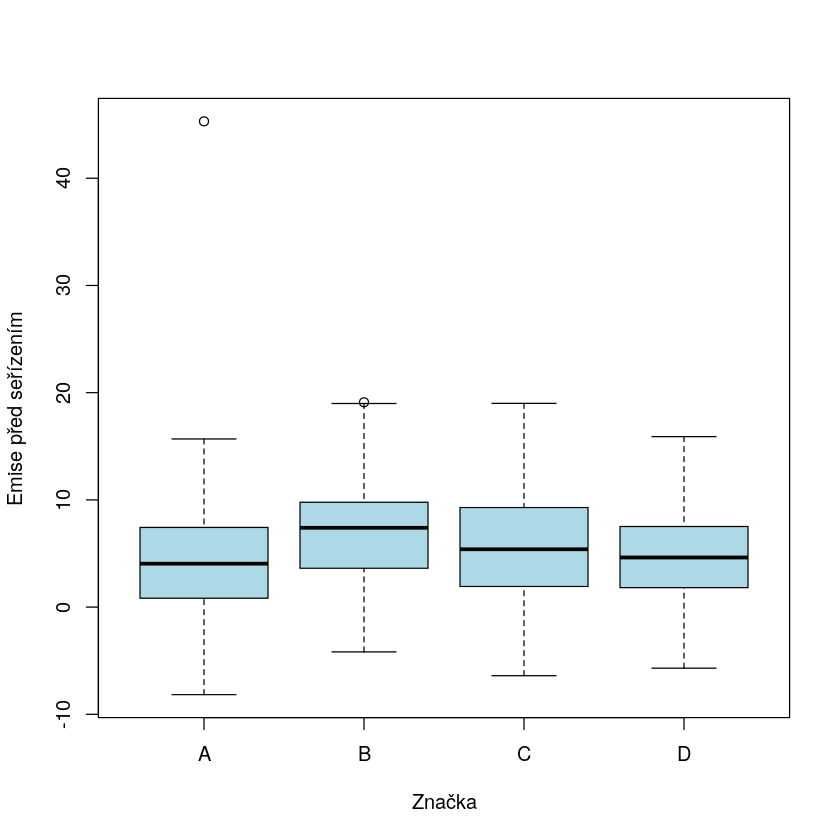

In [26]:
library(dplyr)
# Nastavení náhodného semene pro reprodukovatelnost
set.seed(3)

# Počet motorů pro každou značku
n <- 100

# Generování dat
id <- 1:(4 * n)
odruda <- rep(c("A", "B", "C", "D"), each = n)
vynos_2024 <- round(runif(4 * n, min = 290, max = 310), 2) # emise před seřízením
vynos_2023 <- round(vynos_2024 - rnorm(4 * n, mean = 5, sd = 5), 2) # emise po seřízení
vynos_2024[odruda == "A"] <- vynos_2024[odruda == "A"] - 2 # zvýšení emisí pro značku X
vynos_2024[odruda == "B"] <- vynos_2024[odruda == "B"] + 2 # snížení emisí pro značku Y
vynos_2024[odruda == "C"] <- (vynos_2024[odruda == "C"] - 300) * 1.2 + 300 # zvýšení emisí pro značku Z
typ_hnojiva <- sample(c("synteticke", "prirodni"), 4 * n, replace = TRUE, prob = c(0.3, 0.7)) # 10% problémy
vynos_2023[typ_hnojiva == "synteticke"] <- vynos_2023[typ_hnojiva == "synteticke"] - 1.5 # zvýšení emisí pro problémové motory

# Vytvoření data frame
data <- data.frame(
    id = id,
    odruda = odruda,
    vynos_2024 = vynos_2024,
    vynos_2023 = vynos_2023,
    typ_hnojiva = typ_hnojiva
)

# Zobrazení prvních několika řádků data frame
data$zlepseni <- (data$vynos_2024 - data$vynos_2023)

for (i in 1:4) {
    outliers <- data %>%
        group_by(odruda) %>%
        rstatix::identify_outliers(zlepseni)

    data$vynos_2024 <- ifelse(data$id %in% outliers$id, 300, data$vynos_2024)
    data$vynos_2023 <- ifelse(data$id %in% outliers$id, 300, data$vynos_2023)
    data <- na.omit(data)
}

data$zlepseni <- (data$vynos_2024 - data$vynos_2023)
boxplot(data$zlepseni ~ data$odruda, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")

summry <- data %>%
    group_by(odruda) %>%
    summarise(
        num = n(),
        mean = mean(zlepseni),
        median = median(zlepseni),
        min = min(zlepseni),
        max = max(zlepseni),
        sd = sd(zlepseni),
        norm_test = shapiro.test(zlepseni)$p.value,
        sym_test = lawstat::symmetry.test(zlepseni, boot = FALSE)$p.value
    )
summry
bartlett.test(zlepseni ~ odruda, data = data)
kruskal.test(zlepseni ~ odruda, data = data)
dunn.test::dunn.test(data$zlepseni, data$odruda, method = "bonferroni", altp = TRUE)

data$vynos_2024[16] <- 350

data1 <- data
data1$zlepseni <- (data1$vynos_2024 - data1$vynos_2023)
boxplot(data1$zlepseni ~ data1$odruda, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")


In [27]:
data1 <- data1 %>% select(id,odruda,vynos_2023,vynos_2024,typ_hnojiva)
library(openxlsx)
data1$typ_hnojiva[data1$typ_hnojiva == "synteticke"] <- "profesional"
data1$typ_hnojiva[data1$typ_hnojiva == "prirodni"] <- "amater"
colnames(data1) <- c("id", "vyrobce", "propustnost_puvodni", "propustnost_nova", "montaz")
write.xlsx(data1, file = "zk4B.xlsx", rowNames = FALSE)